In [9]:
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/barnabaspiri/matplotlib_styles/main/PB_white_latex.mplstyle')

In [10]:
from functions import strain_1D_kin
from functions import strain_1D_iso
from functions import disp_to_eps
from functions import eps_to_disp

In [11]:
# PARAMETERS
L1 = 300 # mm
L2 = 600 # mm
A1 = 500 # mm^2
A2 = 1500 # mm^2
σ_Y01 = 250 # MPa
σ_Y02 = 150 # MPa
H_KIN1 = 25e3 # MPa
H_ISO2 = 40e3 # MPa
E = 200e3 # MPa
NU = 0.3 # 1

In [12]:
# DETERMINE u_E
u_range = np.arange(0,1,1e-5)

for i in range(len(u_range)):
    # check the values for the left 1st column
    ε_1 = disp_to_eps(-u_range[i], L1)
    σ_1 = E*ε_1 
    if (np.abs(σ_1) - σ_Y01) > 0 :
        u_E1 = u_range[i]
        break

for i in range(len(u_range)):
    # check the values for the left 2nd column
    ε_2 = disp_to_eps(u_range[i], L2)
    σ_2 = E*ε_2 
    if (np.abs(σ_2) - σ_Y02) > 0 :
        u_E2 = u_range[i]
        break

if u_E1 <= u_E2:
    u_E = u_E1
else:
    u_E = u_E2

print(f'\nThe value of u_E: {round(u_E, 4)} mm')


The value of u_E: 0.375 mm


In [13]:
# DETERMINE u_P
if u_E1 <= u_E2:
    u_P = u_E2
else:
    u_P = u_E1

print(f'\nThe value of u_P: {round(u_P, 4)} mm')


The value of u_P: 0.45 mm


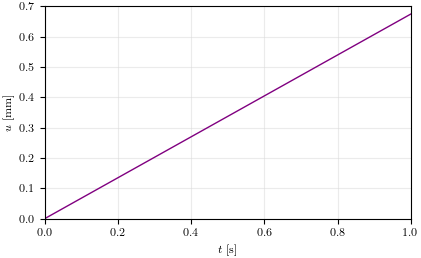

In [14]:
t = np.array([0, 1, 2, 3])
u_ls1 = np.array([0, 1.5*u_P, -0.75*u_P, 0.5*u_P])

t = np.array([0, 1])
u_ls1 = np.array([0, 1.5*u_P])

t_interp = np.linspace(0,1,300)
u_ls1 = np.interp(t_interp, t, u_ls1)

plt.plot(t_interp, u_ls1, '-', color='purple')
plt.xlabel('$t ~ [\\mathrm{s}]$');
plt.ylabel('$u ~ [\\mathrm{mm}]$');
plt.xlim(0,1);
plt.ylim(0,0.7);

In [15]:
# LOADSTEP 1.
ε_1 = disp_to_eps(-u_ls1, L1)
σ_1, λ_1, Y_1, σ_eq1, ε_p1, α_1 = strain_1D_kin(ε_1, E, [σ_Y01, H_KIN1])

ε_2 = disp_to_eps(u_ls1, L2)
σ_2, λ_2, Y_2, σ_eq2, ε_p2 = strain_1D_iso(ε_2, E, [σ_Y02, H_ISO2])


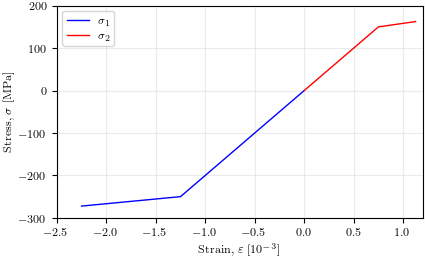

In [16]:
# PLOT LOADSTEP 1.
plt.figure(1)
plt.plot(ε_1*10**3, σ_1, '-', label='$\\sigma_1$', color='blue')
plt.plot(ε_2*10**3, σ_2, '-', label='$\\sigma_2$', color='red')
plt.xlabel('$\\mathrm{Strain,} ~ \\varepsilon ~ [10^{-3}]$')
plt.ylabel('$\\mathrm{Stress,} ~ \\sigma ~ [\\mathrm{MPa}]$')
plt.legend(loc='best', fontsize=8)
plt.xlim(-2.5, 1.2);
plt.ylim(-300, 200);
plt.savefig('sig12_step1.pdf')

In [17]:
# LOADSTEP 2.
u_res, σ_1res = sp.symbols('u_res, σ_1res')

ε_1end = ε_1[-1]
σ_1end = σ_1[-1]

ε_2end = ε_2[-1]
σ_2end = σ_2[-1]

eq1 = σ_1end + E*( disp_to_eps(-u_res,L1) - ε_1end ) - σ_1res
eq2 = -σ_1res/3 + E*( ε_2end - disp_to_eps(u_res,L2) ) - σ_2end

sol = sp.solve([eq1,eq2], u_res, σ_1res)

u_res = sol[u_res]
σ_1res = sol[σ_1res]
σ_2res = -1/3*σ_1res

print(f'\nThe value of u_RES: {round(u_res, 4)} mm')
print(f'\nThe value of σ_1RES: {round(σ_1res, 4)} MPa')
print(f'\nThe value of σ_1RES: {round(σ_2res, 4)} MPa')


The value of u_RES: 0.0292 mm

The value of σ_1RES: 158.3350 MPa

The value of σ_1RES: -52.7783 MPa


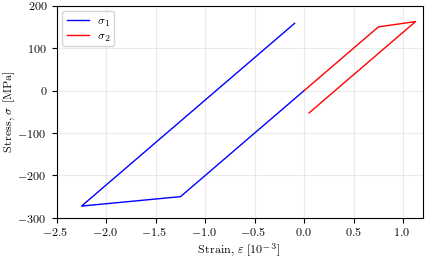

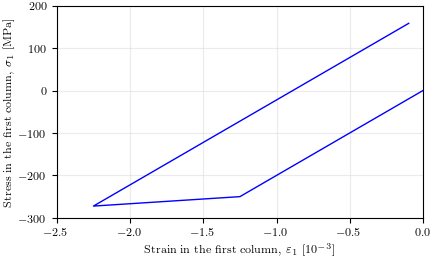

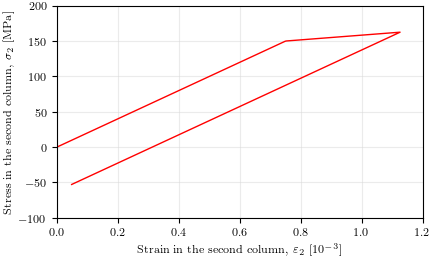

In [18]:
# PLOT LOADSTEP 1 AND 2.

ε_total1 = np.append(ε_1, disp_to_eps(-u_res,L1))
σ_total1 = np.append(σ_1, σ_1res)

ε_total2 = np.append(ε_2, disp_to_eps(u_res,L2))
σ_total2 = np.append(σ_2, σ_2res)


plt.figure(1)
plt.plot(ε_total1*10**3, σ_total1, '-', label='$\\sigma_1$', color='blue')
plt.plot(ε_total2*10**3, σ_total2, '-', label='$\\sigma_2$', color='red')
plt.xlabel('$\\mathrm{Strain,} ~ \\varepsilon ~ [10^{-3}]$')
plt.ylabel('$\\mathrm{Stress,} ~ \\sigma ~ [\\mathrm{MPa}]$')
plt.legend(loc='best', fontsize=8)
plt.xlim(-2.5, 1.2);
plt.ylim(-300, 200);
plt.savefig('sig12_step12.pdf')

plt.figure(2)
plt.plot(ε_total1*10**3, σ_total1, '-', label='$\\sigma_1$', color='blue')
plt.xlabel('$\\mathrm{Strain ~ in ~ the ~ first ~ column,} ~ \\varepsilon_1 ~ [10^{-3}]$')
plt.ylabel('$\\mathrm{Stress ~ in ~ the ~ first ~ column,} ~ \\sigma_1 ~ [\\mathrm{MPa}]$')
plt.xlim(-2.5, 0);
plt.ylim(-300, 200);
plt.savefig('sig1_step12.pdf')

plt.figure(3)
plt.plot(ε_total2*10**3, σ_total2, '-', label='$\\sigma_1$', color='red')
plt.xlabel('$\\mathrm{Strain ~ in ~ the ~ second ~ column,} ~ \\varepsilon_2 ~ [10^{-3}]$')
plt.ylabel('$\\mathrm{Stress ~ in ~ the ~ second ~ column,} ~ \\sigma_2 ~ [\\mathrm{MPa}]$')
plt.xlim(0, 1.2);
plt.ylim(-100, 200);
plt.savefig('sig2_step12.pdf')

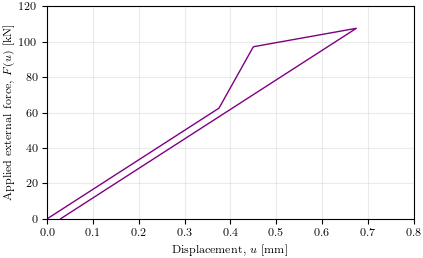

In [19]:
# PLOT THE FORCE HISTORY
u_total = eps_to_disp(-ε_total1,L1)
F = (σ_total1 * A1 + σ_total2 * A2) / 1000

plt.figure(4)
plt.plot(u_total , F, '-', label='$F(u)$', color='purple')
plt.xlabel('$\\mathrm{Displacement,} ~ u ~ [\\mathrm{mm}]$')
plt.ylabel('$\\mathrm{Applied ~ external ~ force,} ~ F(u) ~ [\\mathrm{kN}]$')
plt.xlim(0, 0.8);
plt.ylim(0, 120);
plt.savefig('force_step12.pdf')